# Undersampling, SMOTE, and running models

## Read Undersampled_data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter

import performance_measure
import data_sampling
import split_data_set
import lime_method
import target_parser


# The three models
import decision_tree
import random_forest_method
import svm_method_lime_compatible

Importing Jupyter notebook from performance_measure.ipynb
Importing Jupyter notebook from target_parser.ipynb
Importing Jupyter notebook from pandas_to_latex.ipynb
Importing Jupyter notebook from multiscorer.ipynb
Importing Jupyter notebook from data_sampling.ipynb
Importing Jupyter notebook from random_forest_method.ipynb
Importing Jupyter notebook from split_data_set.ipynb
Importing Jupyter notebook from lime_method.ipynb
Importing Jupyter notebook from svm_method_lime_compatible.ipynb
Importing Jupyter notebook from decision_tree.ipynb


In [2]:
import pandas_to_latex

In [2]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

# Sorting the values:
# undersampled_data.sort_values(by=['TimeStamp'])
# pd.to_datetime(undersampled_data, format="%d%m%Y:%H:%M:%S.%f").sort_values()


In [ ]:
import matplitlib.pyplot as plt
fig = plt.figure
fig.subplots_adjust(hspace = 0.4,wspace=0.3)
fig.tight_layout()
i=1
for column in undersampled_data:
    if (column == 'TimeStamp' or column = 'Status'):
        continue
    ax = fig.add_subplot(17,2,i)
    ax.boxplot()

# REMOVE THE CELL UNDER; THIS IS JUST FOR TESTING

In [21]:
'''undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_9_Substatus_8")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_7")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_30")
'''


'undersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Other")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_9_Substatus_8")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_7")\nundersampled_data = data_sampling.undersample_dataset(undersampled_data,300,"Status_62_Substatus_30")\n'

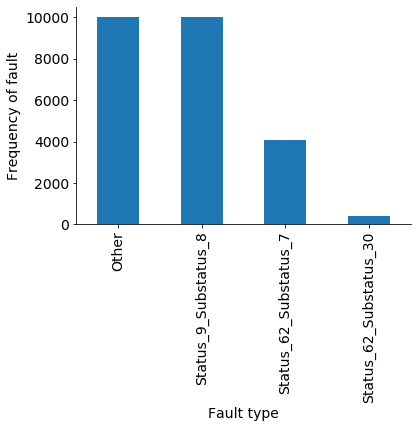

<Figure size 1440x1152 with 0 Axes>

In [22]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [23]:
undersampled_data.head()

,TimeStamp,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,...,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection,Status
0,28-03-2019 23:36:00,5.800000,36.600002,12.880000,246.0,381.0,15.0,36.0,28.0,25.0,...,37.0,26.0,23.0,8.0,27.0,32.0,67.0,47.459999,251.800003,Status_62_Substatus_30
1,25-09-2019 19:32:30,2.000000,6.600000,14.450000,112.0,435.0,31.0,42.0,37.0,21.0,...,42.0,34.0,47.0,16.0,30.0,36.0,60.0,1.000000,114.000000,Other
2,06-04-2019 20:38:30,26.200001,4.800000,11.969999,7.0,230.0,18.0,32.0,26.0,17.0,...,51.0,29.0,40.0,6.0,15.0,21.0,36.0,1.000000,33.200001,Other
3,02-06-2018 00:18:30,27.200001,3.300000,0.980000,31.0,0.0,16.0,19.0,18.0,20.0,...,15.0,25.0,14.0,9.0,17.0,21.0,31.0,60.070000,58.200001,Status_9_Substatus_8
4,17-09-2019 16:32:30,-4.800000,9.000000,17.059999,351.0,678.0,25.0,29.0,33.0,22.0,...,54.0,34.0,44.0,11.0,21.0,20.0,33.0,1.000000,346.200012,Status_9_Substatus_8


In [24]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(24481,)

In [25]:
y.value_counts()

Other                     10000
Status_9_Substatus_8      10000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

### Translate statues codes to int for easier comparison

In [26]:
y_codes = target_parser.status_to_code(y)
print(np.asarray(np.unique(y_codes, return_counts=True)).T)

[[    0 10000]
 [    1 10000]
 [    2  4098]
 [    3   383]]


## SMOTE (BEFORE RANDOM FOREST)

In [27]:

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_smote ,y_smote = sm.fit_resample(X, y)
print(X.shape)
print(y.shape)
print(X_smote.shape)
print(y_smote.shape)
print(pd.Series(y_smote).value_counts())
'''
X_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)
'''

(24481, 34)
(24481,)
(40000, 34)
(40000,)
Other                     10000
Status_9_Substatus_8      10000
Status_62_Substatus_7     10000
Status_62_Substatus_30    10000
dtype: int64


'\nX_test_smote1 ,y_test_smote1 = sm.fit_resample(X_test, y_test)\n'

## Random forest and feature importance

In [30]:


from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(n_estimators=10, random_state=12)
df_rf, y_true, y_pred,rf_performance = performance_measure.times_series_split(rf,X,y,smote=True,convertStatus=True)


# Smote is on the cross validation
'''
df_rf, y_true, y_pred,rf_performance = performance_measure.cross_validate_model(rf,X,y,smote=True,convertStatus=True)
performance_measure.confusion_matrix(y_true,y_pred)
'''

'''rf.fit(X_smote,y_smote)

columns = X.columns
feature_importances = random_forest_method.get_feature_importances(rf, columns)
performance_measure.plot_confusion_matrix(y_true,y_pred,normalize=True,convertStatus=True,name='RF')
performance_measure.get_performance_measures(y_true, y_pred,convertStatus=True)
'''

=============== Paste into Overleaf: ===============

\begin{tabular}{lrrrr}
\toprule
Performance metric &  Feeding fault - (Diff. P-set/P-actual) &  Feeding fault - (Feeding safety circuit faulty) &  Generator heating - (Manual) &        Other \\
\midrule
         Precision &                                0.973706 &                                         0.792697 &                      0.973522 &     0.932975 \\
            Recall &                                0.995320 &                                         0.748401 &                      0.939037 &     0.959676 \\
          F1-score &                                0.977948 &                                         0.779038 &                      0.966357 &     0.938125 \\
           Support &                              683.600000 &                                        64.600000 &                   1666.800000 &  1665.000000 \\
\bottomrule
\end{tabular}

None
 
=============== Paste into Overleaf: ===============

\begin{

"rf.fit(X_smote,y_smote)\n\ncolumns = X.columns\nfeature_importances = random_forest_method.get_feature_importances(rf, columns)\nperformance_measure.plot_confusion_matrix(y_true,y_pred,normalize=True,convertStatus=True,name='RF')\nperformance_measure.get_performance_measures(y_true, y_pred,convertStatus=True)\n"

In [183]:
pandas_to_latex.df_to_latex(feature_importances.head())


\begin{tabular}{r}
\toprule
 importance \\
\midrule
   0.085216 \\
   0.077854 \\
   0.062557 \\
   0.056320 \\
   0.047397 \\
\bottomrule
\end{tabular}



In [184]:
rf_performance

,Performance metric,Feeding fault - (Diff. P-set/P-actual),Feeding fault - (Feeding safety circuit faulty),Generator heating - (Manual),Other
0,Precision,0.985123,0.898739,0.986211,0.972201
1,Recall,1.000000,0.955398,0.972500,0.977200
2,F1-score,0.988059,0.909016,0.983430,0.973187
3,Support,409.800000,38.300000,1000.000000,1000.000000


## SVM

### Split data for LIME

In [185]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)
columns_for_data = X_train.columns
y_train.value_counts()
y_test.value_counts()

Other                     3300
Status_9_Substatus_8      3300
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

### Translate y status codes to ints for lime compatibility

In [186]:
y_train_codes = target_parser.status_to_code(y_train)
y_test_codes  = target_parser.status_to_code(y_test)

print('Counted y_train_codes:')
print(np.asarray(np.unique(y_train_codes, return_counts=True)).T)
print('\nCounted y_test_codes:')
print(np.asarray(np.unique(y_test_codes, return_counts=True)).T)


Counted y_train_codes:
[[   0 6700]
 [   1 6700]
 [   2 2746]
 [   3  256]]

Counted y_test_codes:
[[   0 3300]
 [   1 3300]
 [   2 1352]
 [   3  127]]


### Scale data set for SVM

In [187]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

# Scale the whole dataset first
scaler_whole  = MinMaxScaler()
X_scaled = scaler_whole.fit_transform(X)

# Scale the SMOTE data set:
scaler_whole_smote  = MinMaxScaler()
X_scaled_oversampled = scaler_whole_smote.fit_transform(X_smote)
print(X_scaled_oversampled.shape)

# Scale the train and test, for use with LIME

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_for_data)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns_for_data)
X_train_scaled.head()

(40000, 34)
(16402, 34)
(8079, 34)


,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.479739,0.136612,0.439674,0.389972,0.051667,0.671053,0.635294,0.6875,0.647059,0.642857,...,0.673913,0.761905,0.611111,0.521277,0.591837,0.6625,0.551020,0.473684,0.000000,0.522530
1,0.504959,0.084699,0.398025,0.423398,0.000000,0.394737,0.517647,0.4875,0.423529,0.440476,...,0.152174,0.166667,0.296296,0.170213,0.204082,0.3500,0.387755,0.157895,0.000000,0.566744
2,0.483140,0.562842,0.925290,0.752089,0.858750,0.763158,0.741176,0.7500,0.611765,0.654762,...,0.630435,0.583333,0.333333,0.351064,0.530612,0.7375,0.591837,0.757895,0.425974,0.800085
3,0.502409,0.428962,0.938600,0.376045,0.937917,0.947368,0.941176,0.7625,0.658824,0.678571,...,0.695652,0.761905,0.500000,0.478723,0.653061,0.8250,0.734694,0.842105,0.053451,0.528877
4,0.475772,0.191257,0.578789,0.729805,0.138750,0.631579,0.694118,0.7000,0.647059,0.630952,...,0.630435,0.690476,0.648148,0.478723,0.448980,0.5750,0.448980,0.515789,0.000000,0.649672


In [188]:
print(y.shape)
print(X_smote.shape)
print(X_scaled_oversampled.shape)
print(y_smote.shape)

(24481,)
(40000, 34)
(40000, 34)
(40000,)


In [189]:
# Printing the 5 first columns and 5 first rows for the thesis
def head_row_col(dataframe):
    print_df = dataframe.head().iloc[:,[1,2,3,4,5]].copy()
    print_df["..."]="..."
    return print_df

# The scaled set looks like this
pandas_to_latex.df_to_latex(head_row_col(X_train_scaled))


\begin{tabular}{rrrrrl}
\toprule
 WindSpeed &  RotorSpeed &  NacelleDirection &  ActivePower &  Spinner-Temperature &  ... \\
\midrule
  0.136612 &    0.439674 &          0.389972 &     0.051667 &             0.671053 &  ... \\
  0.084699 &    0.398025 &          0.423398 &     0.000000 &             0.394737 &  ... \\
  0.562842 &    0.925290 &          0.752089 &     0.858750 &             0.763158 &  ... \\
  0.428962 &    0.938600 &          0.376045 &     0.937917 &             0.947368 &  ... \\
  0.191257 &    0.578789 &          0.729805 &     0.138750 &             0.631579 &  ... \\
\bottomrule
\end{tabular}



## SMOTE for training and test data

In [190]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)
X_train_scaled_smote = pd.DataFrame(X_train_scaled_smote, columns=columns_for_data)


In [191]:
X_train_scaled_smote

,WindVane,WindSpeed,RotorSpeed,NacelleDirection,ActivePower,Spinner-Temperature,Log-T-Raw-FrontBearingTemperature,Log-T-Raw-RearBearingTemperature,Log-T-Raw-BladeAPitchHeatSink,Log-T-Raw-BladeBPitchHeatSink,...,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Rectifier2HeatSink,Log-T-Raw-RectifierCabinetTemperature,Log-T-Raw-ExcitationHeatSink,Ambient-Temperature,Log-T-Raw-TowerTemperature,Log-T-Raw-ControlCabinetTemperature,Log-T-Raw-TransformerTemperature,Average blade angle across A B C,WindDirection
0,0.479739,0.136612,0.439674,0.389972,0.051667,0.671053,0.635294,0.687500,0.647059,0.642857,...,0.673913,0.761905,0.611111,0.521277,0.591837,0.662500,0.551020,0.473684,0.000000,0.522530
1,0.504959,0.084699,0.398025,0.423398,0.000000,0.394737,0.517647,0.487500,0.423529,0.440476,...,0.152174,0.166667,0.296296,0.170213,0.204082,0.350000,0.387755,0.157895,0.000000,0.566744
2,0.483140,0.562842,0.925290,0.752089,0.858750,0.763158,0.741176,0.750000,0.611765,0.654762,...,0.630435,0.583333,0.333333,0.351064,0.530612,0.737500,0.591837,0.757895,0.425974,0.800085
3,0.502409,0.428962,0.938600,0.376045,0.937917,0.947368,0.941176,0.762500,0.658824,0.678571,...,0.695652,0.761905,0.500000,0.478723,0.653061,0.825000,0.734694,0.842105,0.053451,0.528877
4,0.475772,0.191257,0.578789,0.729805,0.138750,0.631579,0.694118,0.700000,0.647059,0.630952,...,0.630435,0.690476,0.648148,0.478723,0.448980,0.575000,0.448980,0.515789,0.000000,0.649672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,0.501275,0.306011,0.827823,0.398329,0.517083,0.763158,0.752941,0.830964,0.576471,0.607143,...,0.658850,0.566292,0.462963,0.468571,0.612245,0.762500,0.612245,0.694737,0.000109,0.544955
26796,0.508275,0.540496,0.927732,0.651857,0.850045,0.736842,0.741176,0.726815,0.600000,0.654762,...,0.712655,0.649575,0.333333,0.329787,0.568465,0.714315,0.574393,0.756366,0.208187,0.742727
26797,0.516630,0.310611,0.926516,0.477346,0.856720,0.744603,0.763097,0.805664,0.551333,0.593610,...,0.651707,0.594727,0.333333,0.476526,0.469388,0.710791,0.586256,0.721998,0.026186,0.616429
26798,0.491034,0.491835,0.908862,0.689203,0.932186,0.802632,0.935225,0.637500,0.517647,0.559524,...,0.739130,0.755883,0.231590,0.260701,0.398079,0.725000,0.571429,0.852632,0.158912,0.758218


### Translate y status codes to ints for lime compatibility

In [192]:
y_train_smote_codes = target_parser.status_to_code(y_train_smote)
print(np.asarray(np.unique(y_train_smote_codes, return_counts=True)).T)

[[   0 6700]
 [   1 6700]
 [   2 6700]
 [   3 6700]]


## SVM method

In [193]:
from sklearn.svm import SVC

### BALANCED SVM

=============== Paste into Overleaf: ===============

\begin{tabular}{lrrrr}
\toprule
Performance metric &  Feeding fault - (Diff. P-set/P-actual) &  Feeding fault - (Feeding safety circuit faulty) &  Generator heating - (Manual) &        Other \\
\midrule
         Precision &                                0.690929 &                                         0.038168 &                      0.771059 &     0.749963 \\
            Recall &                                0.852366 &                                         0.604858 &                      0.654000 &     0.365400 \\
          F1-score &                                0.718025 &                                         0.046966 &                      0.744285 &     0.618919 \\
           Support &                              409.800000 &                                        38.300000 &                   1000.000000 &  1000.000000 \\
\bottomrule
\end{tabular}

None
 
Normalized confusion matrix
[[0.85236701 0.07052221 0.0529526

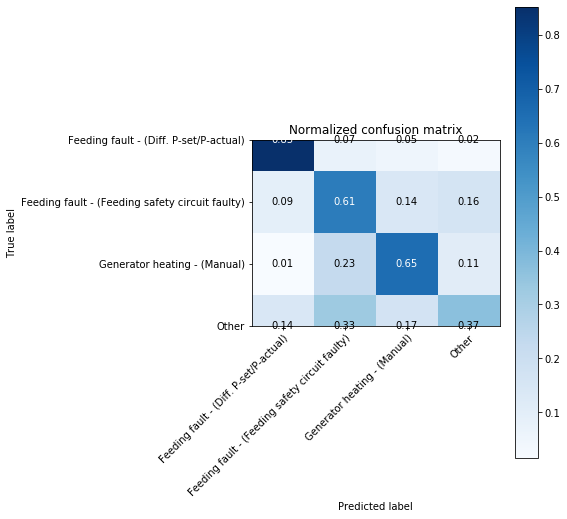

Total Accuracy 		0.569

Status 						 Precision 	 Recall 	 F1
----------------------------------------------------------------------------------------
Feeding fault - (Diff. P-set/P-actual)           0.690 		 0.852 		 0.763
Feeding fault - (Feeding safety circuit faulty)  0.038 		 0.606 		 0.072
Generator heating - (Manual)                     0.771 		 0.654 		 0.708
Other                                            0.749 		 0.365 		 0.491


In [72]:
# Balanced
svm_balanced = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')
df_svm_balanced, y_true_svm_balanced, y_pred_svm_balanced,l = performance_measure.cross_validate_model(svm_balanced,X_scaled,y,convertStatus=True)
performance_measure.plot_confusion_matrix(y_true_svm_balanced,y_pred_svm_balanced,normalize=True,convertStatus=True,name='SVM_class_weight_balanced')
#Plot performance measure
performance_measure.get_performance_measures(y_true_svm_balanced, y_pred_svm_balanced,convertStatus=True)
# svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/p

=============== Paste into Overleaf: ===============

\begin{tabular}{lrrrr}
\toprule
Performance metric &  Feeding fault - (Diff. P-set/P-actual) &  Feeding fault - (Feeding safety circuit faulty) &  Generator heating - (Manual) &        Other \\
\midrule
         Precision &                                0.799976 &                                              0.0 &                      0.768595 &     0.650473 \\
            Recall &                                0.712787 &                                              0.0 &                      0.711900 &     0.751900 \\
          F1-score &                                0.780848 &                                              0.0 &                      0.756380 &     0.668437 \\
           Support &                              409.800000 &                                             38.3 &                   1000.000000 &  1000.000000 \\
\bottomrule
\end{tabular}

None
 
Normalized confusion matrix
[[0.71278673 0.         0.0544167

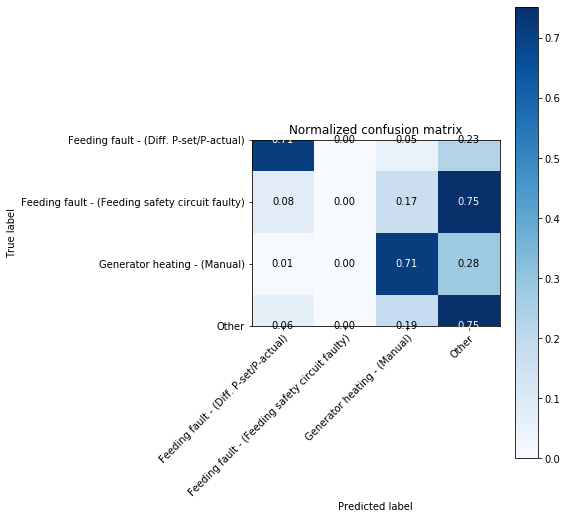

/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Total Accuracy 		0.717

Status 						 Precision 	 Recall 	 F1
----------------------------------------------------------------------------------------
Feeding fault - (Diff. P-set/P-actual)           0.800 		 0.713 		 0.754
Feeding fault - (Feeding safety circuit faulty)  0.000 		 0.000 		 0.000
Generator heating - (Manual)                     0.768 		 0.712 		 0.739
Other                                            0.650 		 0.752 		 0.697


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [73]:
# Unbalanced
svm_unbalanced = SVC(kernel='poly', gamma='auto', random_state=12)
df_svm_unbalanced, y_true_svm_unbalanced, y_pred_svm_unbalanced ,l= performance_measure.cross_validate_model(svm_unbalanced,X_scaled,y,convertStatus=True)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced,y_pred_svm_unbalanced,normalize=True,convertStatus=True, name='SVM_unbalanced')
#Plot performance measure
performance_measure.get_performance_measures(y_true_svm_unbalanced, y_pred_svm_unbalanced,convertStatus=True)
# svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED AND SMOTE SVM (USE THIS RESULT Best results for 62_30)!

=============== Paste into Overleaf: ===============

\begin{tabular}{lrrrr}
\toprule
Performance metric &  Feeding fault - (Diff. P-set/P-actual) &  Feeding fault - (Feeding safety circuit faulty) &  Generator heating - (Manual) &        Other \\
\midrule
         Precision &                                0.728356 &                                         0.042671 &                      0.817908 &     0.761612 \\
            Recall &                                0.911176 &                                         0.653036 &                      0.629700 &     0.440300 \\
          F1-score &                                0.758755 &                                         0.052480 &                      0.771702 &     0.664331 \\
           Support &                              409.800000 &                                        38.300000 &                   1000.000000 &  1000.000000 \\
\bottomrule
\end{tabular}

None
 
Normalized confusion matrix
[[0.91117618 0.00780869 0.0529526

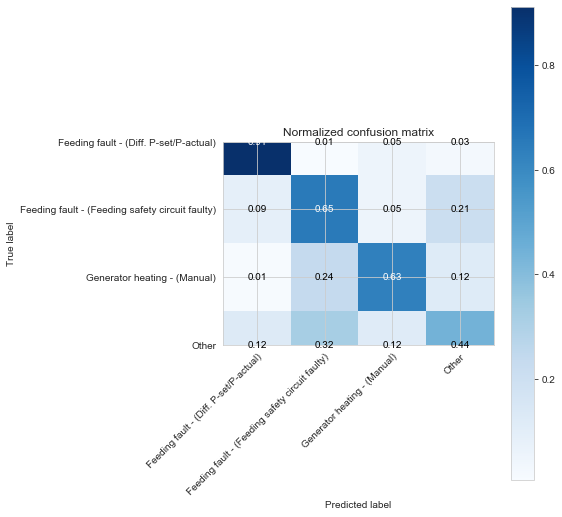

Total Accuracy 		0.600

Status 						 Precision 	 Recall 	 F1
----------------------------------------------------------------------------------------
Feeding fault - (Diff. P-set/P-actual)           0.728 		 0.911 		 0.809
Feeding fault - (Feeding safety circuit faulty)  0.043 		 0.653 		 0.080
Generator heating - (Manual)                     0.818 		 0.630 		 0.712
Other                                            0.761 		 0.440 		 0.558


In [194]:
svm_unbalanced_smote = SVC(kernel='rbf', gamma='auto', random_state=12)
df_svm_unbalanced_smote, y_true_svm_unbalanced_smote, y_pred_svm_unbalanced_smote, svm_smote_performance = performance_measure.cross_validate_model(svm_unbalanced,X_scaled,y,smote=True,convertStatus=True)
performance_measure.plot_confusion_matrix(y_true_svm_unbalanced_smote,y_pred_svm_unbalanced_smote,normalize=True,convertStatus=True,name='SVM_unbalanced_and_smote')
performance_measure.get_performance_measures(y_true_svm_unbalanced_smote, y_pred_svm_unbalanced_smote,convertStatus=True)
# svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and class_weight balanced

In [75]:
print(X_train_scaled_smote.shape)
print(y_train.shape)
print(y_test.shape)
print(y.value_counts())


(26800, 34)
(16402,)
(8079,)
Other                     10000
Status_9_Substatus_8      10000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64


=============== Paste into Overleaf: ===============

\begin{tabular}{lrrrr}
\toprule
Performance metric &  Feeding fault - (Diff. P-set/P-actual) &  Feeding fault - (Feeding safety circuit faulty) &  Generator heating - (Manual) &        Other \\
\midrule
         Precision &                                0.733973 &                                         0.041050 &                      0.821308 &     0.766682 \\
            Recall &                                0.910929 &                                         0.652092 &                      0.631300 &     0.431400 \\
          F1-score &                                0.763531 &                                         0.050514 &                      0.774537 &     0.662871 \\
           Support &                              409.800000 &                                        38.300000 &                   1000.000000 &  1000.000000 \\
\bottomrule
\end{tabular}

None
 
Normalized confusion matrix
[[0.91093216 0.00732064 0.0529526

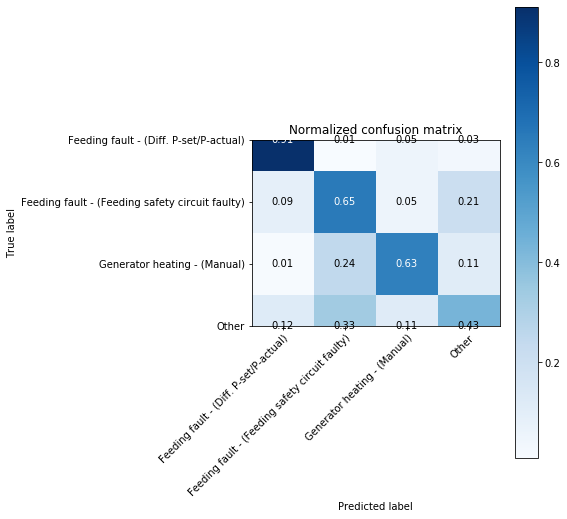

Total Accuracy 		0.597

Status 						 Precision 	 Recall 	 F1
----------------------------------------------------------------------------------------
Feeding fault - (Diff. P-set/P-actual)           0.733 		 0.911 		 0.813
Feeding fault - (Feeding safety circuit faulty)  0.041 		 0.653 		 0.077
Generator heating - (Manual)                     0.821 		 0.631 		 0.714
Other                                            0.766 		 0.431 		 0.552


In [76]:
svm_balanced_smote = SVC(kernel='poly', gamma='auto', random_state=12,class_weight='balanced')

df_svm_balanced_smote, y_true_svm_balanced_smote, y_pred_svm_balanced_smote,l = performance_measure.cross_validate_model(svm_balanced_smote,X_scaled,y,smote=True,convertStatus=True)
performance_measure.plot_confusion_matrix(y_true_svm_balanced_smote,y_pred_svm_balanced_smote,normalize=True,convertStatus=True,name='SVM_class_weight_balanced_and_smote')
performance_measure.get_performance_measures(y_true_svm_balanced_smote, y_pred_svm_balanced_smote,convertStatus=True)
# balanced with smote and undersampling
# svm4 = svm_method.get_svm_model_balanced(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

### SMOTE and probability

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.86316568 0.0443787  0.06286982 0.0295858 ]
 [0.06299213 0.58267717 0.18110236 0.17322835]
 [0.01090909 0.18272727 0.6830303  0.12333333]
 [0.12242424 0.25939394 0.17393939 0.44424242]]


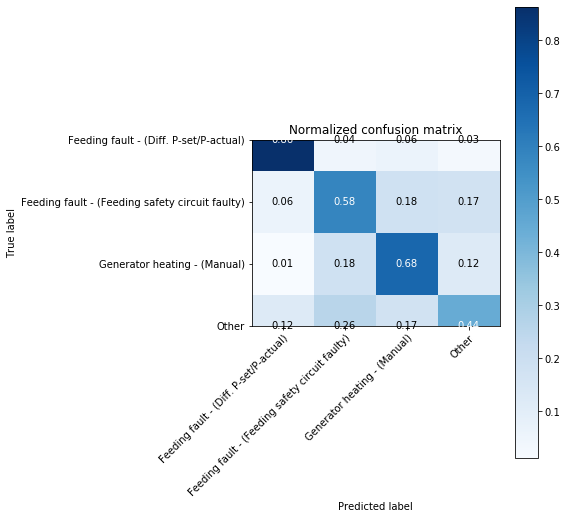

Plotting Performance Measure...
Total Accuracy 		0.614

Status 						 Precision 	 Recall 	 F1
----------------------------------------------------------------------------------------
Feeding fault - (Diff. P-set/P-actual)           0.723 		 0.863 		 0.787
Feeding fault - (Feeding safety circuit faulty)  0.046 		 0.583 		 0.086
Generator heating - (Manual)                     0.768 		 0.683 		 0.723
Other                                            0.758 		 0.444 		 0.560


In [77]:
svm_prob_smote = svm_method_lime_compatible.get_svm_model_balanced_with_prob(X_train_scaled_smote, 
                                                                             X_test_scaled, 
                                                                             y_train_smote_codes, 
                                                                             y_test_codes,
                                                                             convertCode=True,
                                                                             name='SVM_probability_limeCompatible_unbalanced_smote')

#### Run Lime Metod on 

In [78]:
svm_prob_smote.classes_

array([0, 1, 2, 3])

In [79]:
targetNames = svm_prob_smote.classes_
explainer = lime_method.run_lime(X_train_scaled_smote, targetNames)
exp_instance = lime_method.explain_instance(X_test_scaled, svm_prob_smote, explainer, 2)
exp_instance.show_in_notebook(show_table=True) #, show_all=True)

## Decision tree model

### Remove the features from the random forest model called rf


In [195]:
# rf_df = pd.DataFrame(feature_importances)
rf_df = feature_importances

rf_df_extracted = rf_df.head(6)
rf_df_extracted.reset_index()
include_features = rf_df_extracted.index
list_of_features = include_features.tolist()

# The selected features in a list
df_selected_features = pd.DataFrame(list_of_features)
df_selected_features.columns = ['Selected features for decision tree']
df_selected_features

,Selected features for decision tree
0,Log-T-Raw-TransformerTemperature
1,Log-T-Raw-Rectifier1HeatSink
2,Log-T-Raw-Stator1Temperature
3,Log-T-Raw-Rectifier2HeatSink
4,Log-T-Raw-Stator2Temperature
5,Log-T-Raw-Rotor1Temperature


### Convert the selected DT variables to LATEX

In [196]:
# Print to latex
pandas_to_latex.df_to_latex(df_selected_features)


\begin{tabular}{l}
\toprule
Selected features for decision tree \\
\midrule
   Log-T-Raw-TransformerTemperature \\
       Log-T-Raw-Rectifier1HeatSink \\
       Log-T-Raw-Stator1Temperature \\
       Log-T-Raw-Rectifier2HeatSink \\
       Log-T-Raw-Stator2Temperature \\
        Log-T-Raw-Rotor1Temperature \\
\bottomrule
\end{tabular}



In [197]:
# Make the feature names more readable by removing "LOG-" etc.
shorter_feature_names = []
for i, s in enumerate(list_of_features):
    split = s.split("Log-T-Raw-")
    print(split)
    if (len(split)>1):
        shorter_feature_names.append(split[1])
    else:
        shorter_feature_names.append(split[0])
shorter_feature_names

['', 'TransformerTemperature']
['', 'Rectifier1HeatSink']
['', 'Stator1Temperature']
['', 'Rectifier2HeatSink']
['', 'Stator2Temperature']
['', 'Rotor1Temperature']


['TransformerTemperature',
 'Rectifier1HeatSink',
 'Stator1Temperature',
 'Rectifier2HeatSink',
 'Stator2Temperature',
 'Rotor1Temperature']

### Evaluate Decision tree model

#### Setting depth for tree


In [204]:
from sklearn.tree import DecisionTreeClassifier
DEPTH = 3

=============== Paste into Overleaf: ===============

\begin{tabular}{lrrrr}
\toprule
Performance metric &  Feeding fault - (Diff. P-set/P-actual) &  Feeding fault - (Feeding safety circuit faulty) &  Generator heating - (Manual) &        Other \\
\midrule
         Precision &                                0.758534 &                                         0.032705 &                      0.932016 &     0.771055 \\
            Recall &                                0.793075 &                                         0.694265 &                      0.522800 &     0.497200 \\
          F1-score &                                0.765094 &                                         0.040405 &                      0.805524 &     0.694361 \\
           Support &                              409.800000 &                                        38.300000 &                   1000.000000 &  1000.000000 \\
\bottomrule
\end{tabular}

None
 
Normalized confusion matrix
[[0.79306979 0.00146413 0.0510004

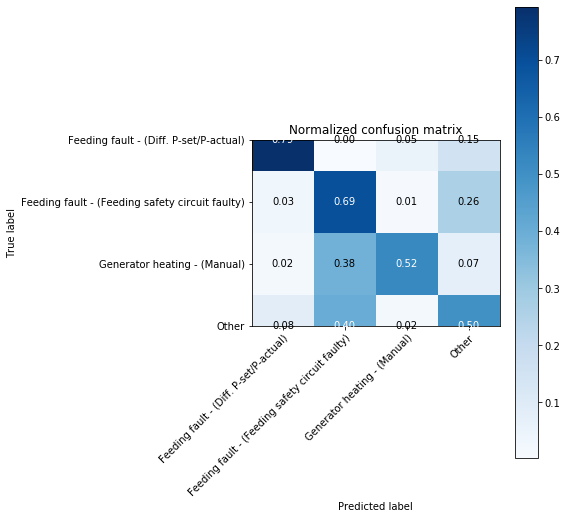

Total Accuracy 		0.560

Status 						 Precision 	 Recall 	 F1
----------------------------------------------------------------------------------------
Feeding fault - (Diff. P-set/P-actual)           0.758 		 0.793 		 0.775
Feeding fault - (Feeding safety circuit faulty)  0.033 		 0.695 		 0.062
Generator heating - (Manual)                     0.932 		 0.523 		 0.670
Other                                            0.771 		 0.497 		 0.605


In [84]:
X_dt = X[include_features.tolist()]
clf_df = DecisionTreeClassifier(criterion = "entropy", random_state=12,max_depth = DEPTH)

df_dt, y_true_dt, y_pred_dt,dt_performance = performance_measure.cross_validate_model(clf_df,X_dt,y,smote=True,convertStatus=True)
performance_measure.plot_confusion_matrix(y_true_dt,y_pred_dt,normalize=True,convertStatus=True,name='DT')
performance_measure.get_performance_measures(y_true_dt, y_pred_dt,convertStatus=True)


In [85]:
import numpy as np

# Training the DT with the SMOTE data (all of it)

X_smote_with_names = (pd.DataFrame(X_smote))
X_smote_with_names.columns = columns_for_data


# data = X_train_scaled_with_names[np.intersect1d(X_train_scaled_with_names, list_of_features)]

# Only including the features in from the Random Forest feature imporances
X_smote_filtered = X_smote_with_names[include_features.tolist()]

# Printing df
X_smote_filtered.head()

,Log-T-Raw-TransformerTemperature,Log-T-Raw-Rectifier1HeatSink,Log-T-Raw-Stator1Temperature,Log-T-Raw-Rotor2Temperature,Log-T-Raw-Rotor1Temperature,Log-T-Raw-Rectifier2HeatSink
0,36.0,57.0,54.0,45.0,47.0,44.0
1,56.0,52.0,73.0,49.0,49.0,49.0
2,34.0,70.0,52.0,38.0,38.0,67.0
3,46.0,49.0,77.0,94.0,78.0,53.0
4,28.0,58.0,37.0,31.0,34.0,59.0


In [205]:
col_rename_dict = {i:j for i,j in zip(X_smote_filtered.columns,shorter_feature_names)}
X_smote_filtered.rename(columns=col_rename_dict, inplace=True)

# X_test_scaled_removed.rename(columns={include_features : shorter_feature_names})
X_smote_filtered.head()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,TransformerTemperature,Rectifier1HeatSink,Stator1Temperature,Rectifier2HeatSink,Stator2Temperature,Rotor1Temperature
0,36.0,57.0,54.0,45.0,47.0,44.0
1,56.0,52.0,73.0,49.0,49.0,49.0
2,34.0,70.0,52.0,38.0,38.0,67.0
3,46.0,49.0,77.0,94.0,78.0,53.0
4,28.0,58.0,37.0,31.0,34.0,59.0


### Training the DT

In [206]:
# Train DT on these features and print it out:

clf_df = DecisionTreeClassifier(criterion = "entropy", random_state=12,max_depth = 2)
clf_df.fit(X_smote_filtered,y_smote)


# dt_depth3 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,3)
# dt_depth2 = decision_tree.get_decision_tree_model(X_train_scaled_removed, X_test_scaled_removed, y_train_smote, y_test_smote,2)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12, splitter='best')

In [209]:
# Print the tree
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import collections

def save_tree(dt,name):
    dot_data = tree.export_graphviz(dt,
                                    feature_names=X_smote_filtered.columns,
                                    out_file=None,
                                    filled=True,
                                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data)

    colors = ('powderblue', 'orange')
    edges = collections.defaultdict(list)

    for edge in graph.get_edge_list():
        edges[edge.get_source()].append(int(edge.get_destination()))

    for edge in edges:
        edges[edge].sort()    
        for i in range(2):
            dest = graph.get_node(str(edges[edge][i]))[0]
            dest.set_fillcolor(colors[i])

    # Exporting image to current directory
    graph.write_png('../Data_Plots/decision_trees/{}.png'.format(name))
    

In [210]:
save_tree(clf_df,"depth2_new")
# save_tree(dt_depth3,"depth3")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
/usr/local/lib/python3.7/site-packages/matplotlib/backends/_backend_pdf_ps.py:62: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=ft2font.LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_ps.py:617: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=LOAD_NO_HINTING)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_ps.py:638: RuntimeWarning: Glyph 9 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)
The PostScript bac

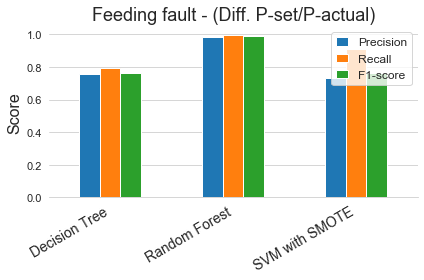

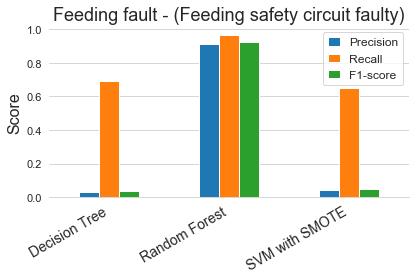

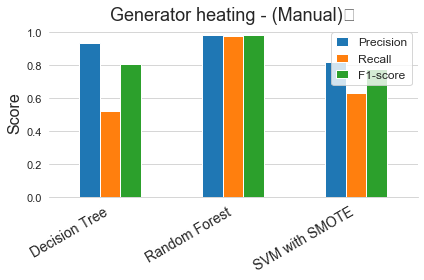

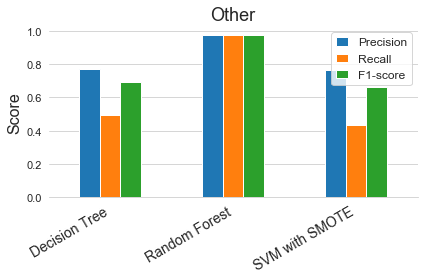

In [166]:
import matplotlib as mpl
import matplotlib
import seaborn as sns
colorname=[]
colorid=[]
for name, hex in matplotlib.colors.cnames.items():
    colorname.append(name)
    colorid.append(hex)

performances_all = [dt_performance,rf_performance,svm_smote_performance]


#fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1,figsize=(8,18))
# fig, ax = plt.subplots(1, 1,figsize=(12,8))
# plt.subplots_adjust(top = 0.9)
d={1:ax1,2:ax2,3:ax3,4:ax4}

# fig.suptitle('Sharing x per column, y per row')

# Plotting each of the 4 subplots in loop
for column in range(1,5):
    fig, ax = plt.subplots()

    index = 0
    plot_df = pd.DataFrame(np.zeros((3, 3)), columns = ["Precision","Recall","F1-score"])
    
    # print("column", column)
    
    for p in performances_all:
        for i in range(0,3):
            s = p.iloc[i,column]
            plot_df.iat[index,i] = s
        index += 1

    
    plot_df = plot_df.set_index([pd.Index(['Decision Tree','Random Forest','SVM with SMOTE'])])


    errors = ['Feeding fault - (Diff. P-set/P-actual)','Feeding fault - (Feeding safety circuit faulty)','Generator heating - (Manual)	','Other']
    # Plotting
    # ax = d.get(column)
    # fig, ax = plt.subplots(1, 1, figsize=(8,4))

    ax.set_ylabel("Score",fontsize=16)
    ax.set_title(errors[column-1],fontsize=18)
    
    sns.set_style("whitegrid")
    sns.despine(left=True)

    labels = ['Decision Tree','Random Forest','SVM with SMOTE']
    ax.grid(False)
    # Color
    cmap = mpl.cm.GnBu(np.linspace(0,1,20))
    cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
    
    import pylab as plot
    params = {'legend.fontsize':12}
    plot.rcParams.update(params)
    
    chart = plot_df.plot.bar(ax=ax,width=0.5,stacked = False,fontsize = 11)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right',fontsize = 14)
    ax.grid(axis='x')
    fig.tight_layout()
    plt.savefig('../Data_Plots/comparing_results/comparing_results{}.eps'.format(column),format='eps')

# plt.savefig(f'../Data_Plots/comparing_results/comparing_results')

    # handles, labels = ax.get_legend_handles_labels()
    # fig.legend(handles, labels, loc='upper right',fontsize = 18)
    # 'seagreen','darkturquoise', 'steelblue'))



In [123]:
viridis = mpl.cm.get_cmap('viridis', 3)
print(viridis.colors)

[[0.267004 0.004874 0.329415 1.      ]
 [0.127568 0.566949 0.550556 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
